In [2]:
import numpy
import nibabel as nib
import os
import matplotlib.pyplot as plt

In [3]:
def display_nifti_slice(filepath, slice_number, cbr_title, inf_limit = None, sup_limit = None, xlim = None, ylim = None, cmap = "gray"):
    # Load the NIfTI image
    img = nib.load(filepath)
    
    # Get the data as a numpy array
    img_data = img.get_fdata()
    
    # Check if the specified slice number is within bounds
    if slice_number < 0 or slice_number >= img_data.shape[2]:
        print("Slice number out of range. Please select a valid slice number.")
        return

    # Select the specified slice
    slice_data = img_data[:, :, slice_number]
    
    # Display the slice
    plt.figure(figsize=(6, 6))
    if inf_limit is None and sup_limit is None:
        plt.imshow(slice_data.T, cmap=cmap, origin='lower')
    else:
        plt.imshow(slice_data.T, cmap=cmap, origin='lower', vmin=inf_limit, vmax=sup_limit)
   
    cbr= plt.colorbar()
    cbr.set_label(cbr_title, rotation = 0, labelpad = 15, fontsize = 15)
    slice_number += 1
    plt.title(f'Slice {slice_number}')

    if xlim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.xlim(xlim)

    if ylim is not None:
        # xlim is a tuple with (xmin,xmax)
        plt.ylim(ylim)

    plt.axis('off')
    plt.show()

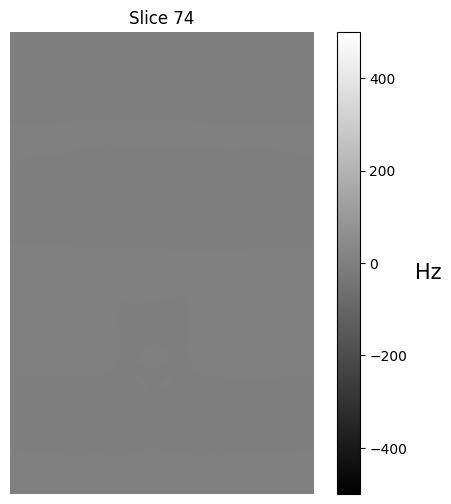

In [7]:
 # Select a long path outside of this folder
long_path = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/quick_AMU/db0_AMU_VC_fm_ppm.nii.gz"
 # We don't care about the image, we just want to take the edited colorbar
inferior_limit = -500 # lowest_value
superior_limit = 500 # highest_value
cmap = 'gray' # Many other choices like: bwr, gray
display_nifti_slice(long_path, 73, 'Hz', inf_limit = inferior_limit, sup_limit = superior_limit, cmap = cmap)